In [11]:
def function1(input_1):
    return input_1 + " Hi "

def function2(input_2):
    return input_2 + " Hello "

In [12]:

from langgraph.graph import Graph, START, END

builder = Graph()

builder.add_node("node1", function1)
builder.add_node("node2", function2)

builder.add_edge("node1", "node2")
builder.add_edge(START, "node1")
builder.add_edge("node2", END)

In [13]:
graph = builder.compile()

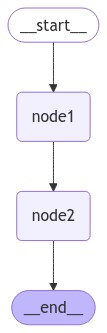

In [15]:
from IPython.display import Image, display

display(Image(graph.get_graph().draw_mermaid_png()))

In [10]:
graph.invoke("Hey")

'HeyHiHello'

## Now calling LLM in Node

In [17]:
import os, dotenv

from dotenv import load_dotenv

load_dotenv()

True

In [18]:
os.environ["GROQ_API_KEY"] = os.getenv("GROQ_API_KEY")

In [19]:
from langchain_groq import ChatGroq

llm = ChatGroq(
    model="mixtral-8x7b-32768",
    temperature = 0.1
)

In [20]:
llm.invoke("Hey")

AIMessage(content="Hello! How can I help you today? If you have any questions about programming, web development, or data science, feel free to ask. I'm here to provide guidance and resources to support your learning journey. 😊", additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 47, 'prompt_tokens': 9, 'total_tokens': 56, 'completion_time': 0.074668837, 'prompt_time': 0.001850746, 'queue_time': 0.012465203, 'total_time': 0.076519583}, 'model_name': 'mixtral-8x7b-32768', 'system_fingerprint': 'fp_c5f20b5bb1', 'finish_reason': 'stop', 'logprobs': None}, id='run-910319c2-2f92-4e4e-896a-407f20cab859-0', usage_metadata={'input_tokens': 9, 'output_tokens': 47, 'total_tokens': 56})

In [21]:
def function_1(input_1):
    response = llm.invoke(input_1)
    return response.content

def function_2(input_2):
    return "Agent says: " + input_2

In [23]:
## Graph

from langgraph.graph import Graph, START, END

builder = Graph()

builder.add_node("node_1", function_1)
builder.add_node("node_2", function_2)

builder.add_edge("node_1", "node_2")
builder.add_edge(START, "node_1")
builder.add_edge("node_2", END)

graph = builder.compile()

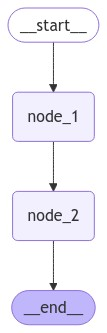

In [29]:
from IPython.display import Image, display

display(Image(graph.get_graph().draw_mermaid_png()))


Here we call the llm model in node1 by sending string message from start and then the node2 get the output of node1 which is llm output then returns the response appending "Agent says: " to the final output at the end of the graph.

In [31]:
response = graph.invoke("Hello")

In [32]:
response

"Agent says: Hello! How can I help you today? If you have any questions about programming, web development, or data science, feel free to ask. I'll do my best to provide a clear and helpful answer. If you don't have a specific question, we can also just chat about technology and related topics."

## Another case
`**Start**`: what is the weather in "city"

`**Node1**`: parse the country name from the string.

`**Node2**`: Get the HDI of that country.

In [75]:
from langchain_core.messages import HumanMessage, SystemMessage
from langchain_core.prompts import ChatPromptTemplate


def function_1(input_1):
    messages = [
    ("system", "You will extract the country name from the text. Just return the country name. e.g what is the weather of Nepal.\n \n Nepal"),
    ("human","The string to extract location: {input_1}")
    ]

    prompt_template = ChatPromptTemplate.from_messages(messages)
    prompt = prompt_template.invoke({
    "input_1": input_1
    })
    result = llm.invoke(prompt)
    return result.content

In [77]:
function_1("What is the weather of norway")

'Norway'

In [88]:
def get_weather_sample(city: str):
    """Return the sample HDI from the city name"""
    return f"The HDI of {city} is <int: after actual data fetch>"

In [89]:
def function_2(input_2):
    result = get_weather_sample(input_2)
    return result

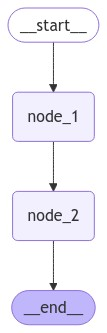

In [90]:
from langgraph.graph import Graph, START, END
from IPython.display import display, Image

builder = Graph()
builder = builder.add_node("node_1", function_1)
builder = builder.add_node("node_2", function_2)
builder = builder.add_edge(START,"node_1")
builder = builder.add_edge("node_1", "node_2")
builder = builder.add_edge("node_2", END)
graph = builder.compile()

display(Image(graph.get_graph().draw_mermaid_png()))

In [91]:
response = graph.invoke("What is the HDI of Nepal")

In [92]:
response

'The HDI of Nepal is <int: after actual data fetch>'

## Agent State in all node